<a href="https://colab.research.google.com/github/SowjanyaKiran/Data_Visualization_EDA_Sowjanya/blob/main/EDA_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Importing the training data
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [20]:
# Importing the testing data
df_test = pd.read_csv('/content/train.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [21]:
# Getting the shape
print('Training Shape :', df_train.shape)
print('Testing Shape :', df_test.shape)

Training Shape : (550068, 12)
Testing Shape : (550068, 12)


In [22]:
# Dropping the 'Purchase' column from training data
df_train = df_train.drop('Purchase', axis=1)

In [23]:
# Getting the shape
print('Training Shape :', df_train.shape)
print('Testing Shape :', df_test.shape)

Training Shape : (550068, 11)
Testing Shape : (550068, 12)


In [24]:
# Concatenating the training and testing data
df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,NaN
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,NaN


In [25]:
# Getting an idea about duplicate rows
df.duplicated().sum()

np.int64(0)

In [26]:
# Getting an idea an data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100136 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   User_ID                     1100136 non-null  int64  
 1   Product_ID                  1100136 non-null  object 
 2   Gender                      1100136 non-null  object 
 3   Age                         1100136 non-null  object 
 4   Occupation                  1100136 non-null  int64  
 5   City_Category               1100136 non-null  object 
 6   Stay_In_Current_City_Years  1100136 non-null  object 
 7   Marital_Status              1100136 non-null  int64  
 8   Product_Category_1          1100136 non-null  int64  
 9   Product_Category_2          752860 non-null   float64
 10  Product_Category_3          333642 non-null   float64
 11  Purchase                    550068 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 109.1+ MB


In [27]:
# Dropping the 'User_ID' column
df = df.drop('User_ID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100136 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  1100136 non-null  object 
 1   Gender                      1100136 non-null  object 
 2   Age                         1100136 non-null  object 
 3   Occupation                  1100136 non-null  int64  
 4   City_Category               1100136 non-null  object 
 5   Stay_In_Current_City_Years  1100136 non-null  object 
 6   Marital_Status              1100136 non-null  int64  
 7   Product_Category_1          1100136 non-null  int64  
 8   Product_Category_2          752860 non-null   float64
 9   Product_Category_3          333642 non-null   float64
 10  Purchase                    550068 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 100.7+ MB


In [28]:
# value_counts()
df['Gender'].value_counts()

,count
Gender,
M,828518
F,271618


In [29]:
# Handling Categorical Data
df['Gender'] = df['Gender'].map({'F' : 0, 'M' : 1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,NaN
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,NaN
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,NaN
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,NaN
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,NaN


In [30]:
# Getting unique values from the column
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [31]:
# Getting unique values from the column
df['Age'].nunique()

7

In [32]:
# Getting unique values from the column
df['Age'].value_counts()

,count
Age,
26-35,439174
36-45,220026
18-25,199320
46-50,91402
51-55,77002
55+,43008
0-17,30204


In [33]:
# Mapping
df['Age'] = df['Age'].map({'0-17' : 1, '18-25' : 2, '26-35' : 3,
                           '36-45' : 4, '46-50' : 5, '51-55' : 6,
                           '55+' : 7})
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2])

In [34]:
# Getting the columns
print(df.columns)

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [35]:
# Getting the unique values in "Occupation" column
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [36]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Encode labels in columns 'City_Category'
encoder = LabelEncoder()
df['City_Category'] = encoder.fit_transform(df['City_Category'])
df['City_Category'].unique()

array([0, 2, 1])

In [37]:
# Getting an idea about NULL values
df.isnull().sum().any()

np.True_

In [38]:
# Getting an idea about column wise sum of NULL values
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,347276
Product_Category_3,766494


In [39]:
# Getting the unique values in 'Product_Category_2' column
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [40]:
245982 / len(df)

0.2235923558541853

In [41]:
# Replacing missing values in 'Product_Category_2' with mode() of that column
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,766494


In [42]:
# Getting the unique values in 'Product_Category_3' column
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [43]:
545809 / len(df)

0.49612866045652537

In [44]:
# Replacing missing values in 'Product_Category_3' with a seperate category
df['Product_Category_3'] = df['Product_Category_3'].fillna(19.0)
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0


In [45]:
# Final check for missing values
df.isnull().sum().any()

np.True_

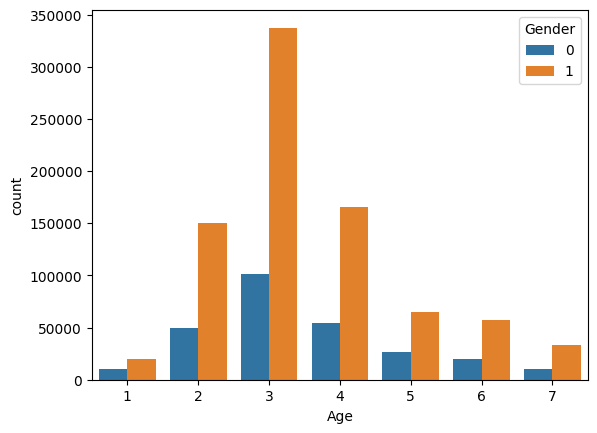

In [46]:
# Visualization Plots ->
# Countplot for Age
sns.countplot(x = 'Age', hue = 'Gender', data = df)
plt.show()

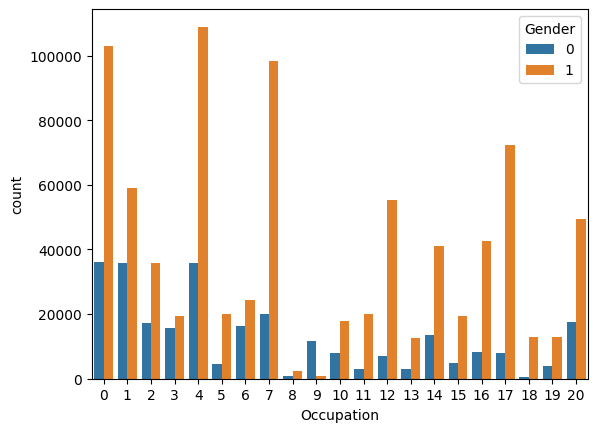

In [47]:
# Countplot for Occupation
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)
plt.show()

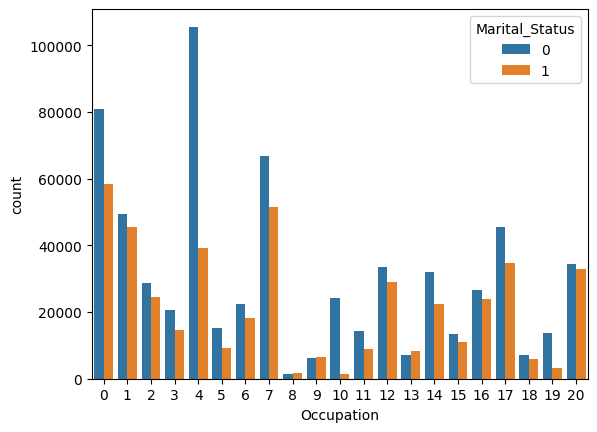

In [48]:
# Countplot for Occupation
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)
plt.show()

In [49]:
# Cross tabulated Matrix for Gender and Occupation
a = pd.crosstab(df['Gender'], df['Occupation'])
print(a)

Occupation      0      1      2      3       4      5      6      7     8   \
Gender                                                                       
0            36224  35968  17258  15838   35672   4440  16320  20056   722   
1           103052  58884  35918  19462  108944  19914  24390  98210  2370   

Occupation     9   ...     11     12     13     14     15     16     17  \
Gender             ...                                                    
0           11686  ...   3000   6938   2996  13526   4780   8214   7858   
1             896  ...  20172  55420  12460  41092  19550  42528  72228   

Occupation     18     19     20  
Gender                           
0             460   4034  17622  
1           12784  12888  49502  

[2 rows x 21 columns]


In [50]:
# Getting all the column names
print(df.columns)

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


In [51]:
# Getting the number of cities
df['City_Category'].nunique()

3

In [52]:
# Getting the number of products
df['Product_ID'].nunique()

3631

In [53]:
# Getting the number of products
df['Product_Category_1'].nunique()

20

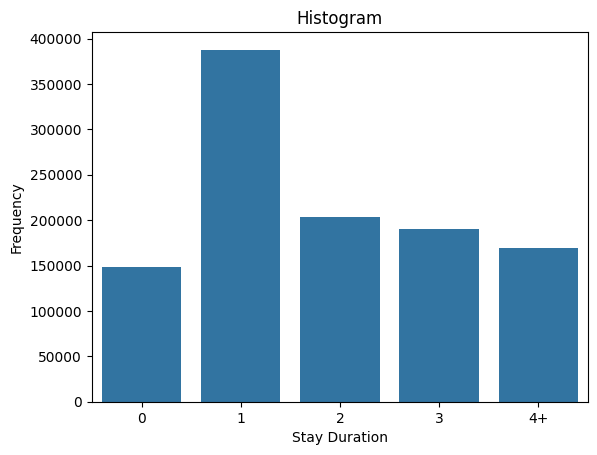

In [54]:
# Histogram for 'Stay Duration'
sns.countplot(x = 'Stay_In_Current_City_Years', data = df, order = ['0', '1', '2', '3', '4+'])
plt.title('Histogram')
plt.xlabel('Stay Duration')
plt.ylabel('Frequency')
plt.show()

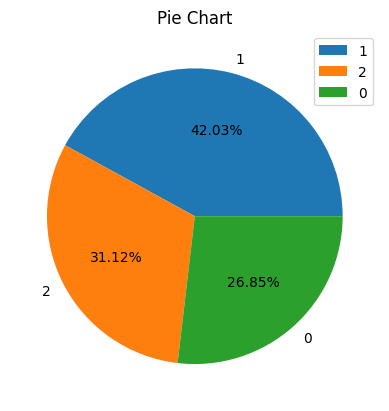

In [55]:
# Pie Chart for 'City_Category'
values = df['City_Category'].value_counts().values
index = df['City_Category'].value_counts().index
plt.pie(values, labels = index, autopct = '%.2f%%')
plt.title('Pie Chart')
plt.legend()
plt.show()

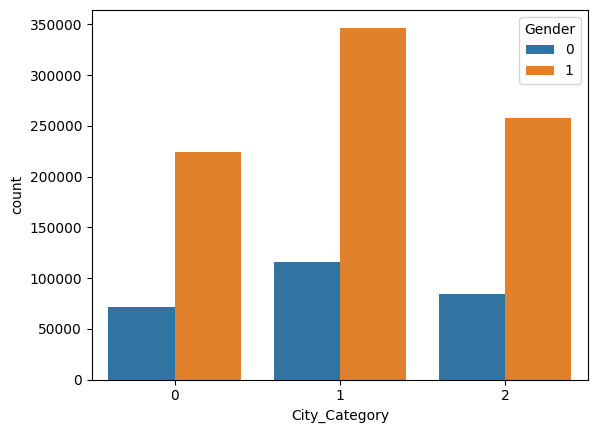

In [56]:
# Countplot for Occupation
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)
plt.show()